
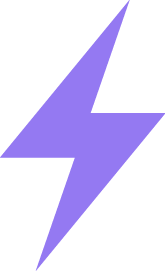

Running local mode, some functionality limited.



In [1]:
####Geopy instructions are located at https://pypi.python.org/pypi/geopy ####
####DBSCAN instructions are located at 
import numpy as np
import pandas as pd
import geopy
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from pylab import *
from numpy import random
import pdb
from geopy.distance import lonlat, distance, geodesic
import os
import tarfile
pd.options.display.max_columns = 100
##### First Install Lightning using the "pip install lightning-python" Command on the C:\> Command line #######
from lightning import Lightning
lgn = Lightning(ipython=True, local=True)

In [2]:
#from citypairs.ipynb
df = pd.read_csv('100k_distances.csv').sort_values('pop', ascending = False).drop_duplicates(['power'])

In [3]:
print(df.shape)
df.head()

(552826, 30)


Unnamed: 0  level_0  Unnamed: 0.1          2016        2016_x  \
485155      485617  5784505          1942  1.378665e+09  1.378665e+09   
989636      990577  8986580          1942  1.378665e+09  1.024032e+08   
70010        70077  1565540          1942  1.378665e+09  2.412716e+07   
880332      881169  8276628          1942  1.378665e+09  4.060605e+07   
551368      551893  6099459          1942  1.378665e+09  1.378665e+09   

       Country Code Country Code_x      city city_ascii city_ascii_x  \
485155          CHN            CHN  Shanghai   Shanghai      Huaibei   
989636          CHN            ETH  Shanghai   Shanghai    Bahir Dar   
70010           CHN            AUS  Shanghai   Shanghai        Perth   
880332          CHN            DZA  Shanghai   Shanghai     Laghouat   
551368          CHN            CHN  Shanghai   Shanghai    Zhenjiang   

           city_x country  country_x  index  index_x iso2 iso2_x iso3 iso3_x  \
485155    Huaibei   China      China    NaN   1741.0   CN     CN  CHN    CHN   
989636  Bahir Dar   China   Ethiopia    NaN   2564.0   CN     ET  CHN    ETH   
70010       Perth   China  Australia    NaN    507.0   CN     AU  CHN    AUS   
880332   Laghouat   China    Algeria    NaN   2380.0   CN     DZ  CHN    DZA   
551368  Zhenjiang   China      China    NaN   1812.0   CN     CN  CHN    CHN   

              lat      lat_x         lng       lng_x         pop      pop_x  \
485155  31.216452  33.950368  121.436505  116.750021  14797756.0   908019.5   
989636  31.216452  11.600053  121.436505   37.383289  14797756.0   187823.5   
70010   31.216452 -31.955015  121.436505  115.839999  14797756.0  1206108.0   
880332  31.216452  33.809989  121.436505    2.880020  14797756.0   108279.0   
551368  31.216452  32.219983  121.436505  119.430012  14797756.0   743276.0   

        province         province_x  combined_pop      distance         power  
485155  Shanghai              Anhui    15705775.5    534.246274  29398.006593  
989636  Shanghai             Amhara    14985579.5   8793.713950   1704.124058  
70010   Shanghai  Western Australia    16003864.0   7016.691578   2280.827627  
880332  Shanghai           Laghouat    14906035.0  10354.937746   1439.509861  
551368  Shanghai            Jiangsu    15541032.0    220.331967  70534.621998

In [4]:
df.isnull().sum()

Unnamed: 0             0
level_0                0
Unnamed: 0.1           0
2016                1332
2016_x              3923
Country Code           0
Country Code_x         0
city                   0
city_ascii             0
city_ascii_x           0
city_x                 0
country                0
country_x              0
index             552826
index_x                0
iso2                   0
iso2_x                 0
iso3                   0
iso3_x                 0
lat                    0
lat_x                  0
lng                    0
lng_x                  0
pop                    0
pop_x                  0
province            2711
province_x          4646
combined_pop           0
distance               0
power                  0
dtype: int64

In [5]:
df.sort_values(by='power', ascending = False).head()

Unnamed: 0  level_0  Unnamed: 0.1         2016       2016_x  \
921562      922439  8568994          2471   95688681.0   95688681.0   
172639      172804  2707740          1128  207652865.0  207652865.0   
732190      732886  7235894          2086   78736153.0    5125821.0   
98897        98992  1896073           616  162951560.0  162951560.0   
169485      169647  2662530          1127  207652865.0  207652865.0   

       Country Code Country Code_x            city      city_ascii  \
921562          EGY            EGY           Cairo           Cairo   
172639          BRA            BRA       Sao Paulo       Sao Paulo   
732190          COD            COG        Kinshasa        Kinshasa   
98897           BGD            BGD           Dhaka           Dhaka   
169485          BRA            BRA  Rio de Janeiro  Rio de Janeiro   

       city_ascii_x       city_x           country            country_x  \
921562      El Giza      El Giza             Egypt                Egypt   
172639  Santo Andre  Santo Andre            Brazil               Brazil   
732190  Brazzaville  Brazzaville  Congo (Kinshasa)  Congo (Brazzaville)   
98897   Narayanganj  Narayanganj        Bangladesh           Bangladesh   
169485      Niteroi      Niteroi            Brazil               Brazil   

        index  index_x iso2 iso2_x iso3 iso3_x        lat      lat_x  \
921562    NaN   2458.0   EG     EG  EGY    EGY  30.049960  30.009989   
172639    NaN    847.0   BR     BR  BRA    BRA -23.558680 -23.652834   
732190    NaN   2103.0   CD     CG  COD    COG  -4.329724  -4.259186   
98897     NaN    606.0   BD     BD  BGD    BGD  23.723060  23.620404   
169485    NaN    833.0   BR     BR  BRA    BRA -22.925023 -22.900012   

              lng      lng_x         pop      pop_x        province  \
921562  31.249968  31.190024   9813807.0  2681863.0      Al Qahirah   
172639 -46.625020 -46.527817  14433147.5   662373.0       São Paulo   
732190  15.314972  15.284689   6704351.5  1259445.0   Kinshasa City   
98897   90.408579  90.499995   9899167.0   223622.0           Dhaka   
169485 -43.225021 -43.099990   6879087.5   993920.0  Rio de Janeiro   

            province_x  combined_pop   distance         power  
921562        Al Jizah    12495670.0   7.284660  1.715340e+06  
172639       São Paulo    15095520.5  14.392934  1.048815e+06  
732190            Pool     7963796.5   8.493706  9.376115e+05  
98897            Dhaka    10122789.0  14.704493  6.884147e+05  
169485  Rio de Janeiro     7873007.5  13.122406  5.999667e+05

In [6]:
df.sort_values(by='combined_pop', ascending = False).head()

Unnamed: 0  level_0  Unnamed: 0.1          2016       2016_x  \
290720      290997  3708815          1942  1.378665e+09  207652865.0   
56347        56401   882191          1942  1.378665e+09   43847430.0   
55978        56032   881377          1128  2.076529e+08   43847430.0   
109948      110053  1943779          1942  1.378665e+09  162951560.0   
932882      933769  8625173          1942  1.378665e+09   95688681.0   

       Country Code Country Code_x       city city_ascii  city_ascii_x  \
290720          CHN            BRA   Shanghai   Shanghai     Sao Paulo   
56347           CHN            ARG   Shanghai   Shanghai  Buenos Aires   
55978           BRA            ARG  Sao Paulo  Sao Paulo  Buenos Aires   
109948          CHN            BGD   Shanghai   Shanghai         Dhaka   
932882          CHN            EGY   Shanghai   Shanghai         Cairo   

              city_x country   country_x  index  index_x iso2 iso2_x iso3  \
290720     Sao Paulo   China      Brazil    NaN   1128.0   CN     BR  CHN   
56347   Buenos Aires   China   Argentina    NaN    275.0   CN     AR  CHN   
55978   Buenos Aires  Brazil   Argentina    NaN    275.0   BR     AR  BRA   
109948         Dhaka   China  Bangladesh    NaN    616.0   CN     BD  CHN   
932882         Cairo   China       Egypt    NaN   2471.0   CN     EG  CHN   

       iso3_x        lat      lat_x         lng      lng_x         pop  \
290720    BRA  31.216452 -23.558680  121.436505 -46.625020  14797756.0   
56347     ARG  31.216452 -34.602502  121.436505 -58.397531  14797756.0   
55978     ARG -23.558680 -34.602502  -46.625020 -58.397531  14433147.5   
109948    BGD  31.216452  23.723060  121.436505  90.408579  14797756.0   
932882    EGY  31.216452  30.049960  121.436505  31.249968  14797756.0   

             pop_x   province              province_x  combined_pop  \
290720  14433147.5   Shanghai               São Paulo    29230903.5   
56347   11862073.0   Shanghai  Ciudad de Buenos Aires    26659829.0   
55978   11862073.0  São Paulo  Ciudad de Buenos Aires    26295220.5   
109948   9899167.0   Shanghai                   Dhaka    24696923.0   
932882   9813807.0   Shanghai              Al Qahirah    24611563.0   

            distance         power  
290720  18568.614231   1574.210285  
56347   19628.123784   1358.246427  
55978    1674.283854  15705.353926  
109948   3165.472088   7801.971496  
932882   8367.195426   2941.435182

In [7]:
usa = df[df['iso3'] == 'USA'][df['iso3_x'] == 'USA']
usa.sort_values('power', ascending = False)

/home/matthew/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Empty DataFrame
Columns: [Unnamed: 0, level_0, Unnamed: 0.1, 2016, 2016_x, Country Code, Country Code_x, city, city_ascii, city_ascii_x, city_x, country, country_x, index, index_x, iso2, iso2_x, iso3, iso3_x, lat, lat_x, lng, lng_x, pop, pop_x, province, province_x, combined_pop, distance, power]
Index: []

In [8]:
concise = df.sort_values('power', ascending = False)[['Country Code','Country Code_x','city','city_x','pop','pop_x','combined_pop','distance','power']]

In [9]:
concise.head()

Country Code Country Code_x            city       city_x         pop  \
921562          EGY            EGY           Cairo      El Giza   9813807.0   
172639          BRA            BRA       Sao Paulo  Santo Andre  14433147.5   
732190          COD            COG        Kinshasa  Brazzaville   6704351.5   
98897           BGD            BGD           Dhaka  Narayanganj   9899167.0   
169485          BRA            BRA  Rio de Janeiro      Niteroi   6879087.5   

            pop_x  combined_pop   distance         power  
921562  2681863.0    12495670.0   7.284660  1.715340e+06  
172639   662373.0    15095520.5  14.392934  1.048815e+06  
732190  1259445.0     7963796.5   8.493706  9.376115e+05  
98897    223622.0    10122789.0  14.704493  6.884147e+05  
169485   993920.0     7873007.5  13.122406  5.999667e+05

In [10]:
concise['same'] = np.where(concise['Country Code'] == concise['Country Code_x'], 'yes', 'no')

In [11]:
concise[concise['same'] == 'no'].sort_values('distance').head()

Country Code Country Code_x       city       city_x        pop  \
940633           GIB            ESP  Gibraltar    Algeciras   106813.5   
732190           COD            COG   Kinshasa  Brazzaville  6704351.5   
710553           BDI            COD  Bujumbura        Uvira   331700.0   
1021881          CHE            FRA      Basel     Mulhouse   500317.5   
1022345          DEU            FRA   Freiburg     Mulhouse   235427.5   

             pop_x  combined_pop   distance          power same  
940633    106687.5      213501.0   7.987691   26728.750987   no  
732190   1259445.0     7963796.5   8.493706  937611.536484   no  
710553    164353.0      496053.0  24.455950   20283.530464   no  
1021881   163442.0      663759.5  26.121695   25410.276920   no  
1022345   163442.0      398869.5  47.808272    8343.106473   no

In [12]:
concise[concise['same'] == 'yes'].sort_values('distance', ascending = False).head(10)

Country Code Country Code_x            city     city_x       pop  \
1035142          FRA            FRA  Fort-de-France  St.-Denis  172622.0   
1009943          FRA            FRA       St.-Denis      Brest  163621.0   
1035159          FRA            FRA          Rennes  St.-Denis  204329.5   
1008892          FRA            FRA       St.-Denis       Caen  163621.0   
1035167          FRA            FRA        Le Havre  St.-Denis  214048.0   
1035153          FRA            FRA           Rouen  St.-Denis  321417.5   
1035146          FRA            FRA          Nantes  St.-Denis  357903.0   
1035163          FRA            FRA           Lille  St.-Denis  636164.0   
1021504          FRA            FRA       St.-Denis     Amiens  163621.0   
1035134          FRA            FRA          Angers  St.-Denis  178329.5   

            pop_x  combined_pop      distance      power same  
1035142  163621.0      336243.0  13305.996142  25.270036  yes  
1009943  142914.0      306535.0   9706.559466  31.580191  yes  
1035159  163621.0      367950.5   9519.349245  38.652905  yes  
1008892  150361.5      313982.5   9518.246944  32.987429  yes  
1035167  163621.0      377669.0   9515.242187  39.690950  yes  
1035153  163621.0      485038.5   9455.648460  51.296165  yes  
1035146  163621.0      521524.0   9453.770478  55.165714  yes  
1035163  163621.0      799785.0   9436.657765  84.752994  yes  
1021504  118908.5      282529.5   9422.967758  29.983070  yes  
1035134  163621.0      341950.5   9409.591527  36.340632  yes

In [13]:
lrt = concise.sort_values('power', ascending = False)[concise['distance'] < 100]
hsr = concise.sort_values('power', ascending = False)[concise['distance'] > 100][concise['distance'] < 1000]
flight = concise.sort_values('power', ascending = False)[concise['distance'] > 1000]

/home/matthew/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [14]:
concise.sort_values('power', ascending = False)

Country Code Country Code_x               city               city_x  \
921562           EGY            EGY              Cairo              El Giza   
172639           BRA            BRA          Sao Paulo          Santo Andre   
732190           COD            COG           Kinshasa          Brazzaville   
98897            BGD            BGD              Dhaka          Narayanganj   
169485           BRA            BRA     Rio de Janeiro              Niteroi   
749035           COL            COL           Medellin                Bello   
168434           BRA            BRA     Rio de Janeiro      Duque de Caxias   
737472           COL            COL       Barranquilla              Soledad   
176843           BRA            BRA          Sao Paulo              Jundiai   
246209           BRA            BRA          Sao Paulo               Santos   
189453           BRA            BRA             Recife               Olinda   
490390           CHN            CHN          Guangzhou               Foshan   
188402           BRA            BRA             Recife             Jaboatao   
392666           CHN            CHN            Beijing            Changping   
570268           CHN            CHN               Xian             Xianyang   
265065           BRA            BRA            Vitória           Vila Velha   
167383           BRA            BRA     Rio de Janeiro          Nova Iguacu   
658551           CHN            CHN          Guangzhou             Dongguan   
32633            ARG            ARG       Buenos Aires             La Plata   
175792           BRA            BRA          Sao Paulo    Braganca Paulista   
904746           EGY            EGY              Cairo                Benha   
154765           BRA            BRA       Porto Alegre               Canoas   
586051           CHN            CHN           Shanghai               Suzhou   
522990           CHN            CHN            Beijing             Langfang   
186302           BRA            BRA          Sao Paulo                  Itu   
553470           CHN            CHN           Shanghai              Jiaxing   
267229           BRA            BRA          Sao Paulo             Campinas   
329297           CHL            CHL           Santiago         San Bernardo   
177894           BRA            BRA          Sao Paulo  Sao Jose dos Campos   
1065689          GBR            GBR             London                Luton   
...              ...            ...                ...                  ...   
594138           CHL            CHN             Curico               Golmud   
438415           BRA            CHN  Santa Cruz do Sul             Huanghua   
610783           BRA            CHN          Apucarana                Houma   
160168           CHN            BRA           Huanghua            Apucarana   
150631           CHN            BRA            Sanming            Barbacena   
478533           CHL            CHN       Punta Arenas               Nancha   
610659           ARG            CHN        San Nicolas                Houma   
438295           ARG            CHN        San Nicolas             Huanghua   
234823           CHN            BRA             Hailun                 Bage   
356612           CHL            CHN             Curico              Sanming   
234827           CHN            BRA             Nancha                 Bage   
474329           CHL            CHN       Punta Arenas               Hailun   
149580           CHN            BRA            Sanming         Pouso Alegre   
356464           BRA            CHN          Catanduva              Sanming   
356437           BRA            CHN  Santa Cruz do Sul              Sanming   
234744           CHN            BRA            Tongren                 Bage   
339891           CHN            CHL            Linqing               Curico   
234791           CHN            BRA            Linqing                 Bage   
213691           CHN            BRA            Sanming    

In [15]:
concise.sort_values('power', ascending = False)[concise['distance'] > 1000]

Country Code Country Code_x               city        city_x  \
677488          CHN            CHN           Shanghai       Beijing   
657519          CHN            CHN           Shanghai     Guangzhou   
658570          CHN            CHN           Shanghai      Dongguan   
660672          CHN            CHN           Shanghai       Taiyuan   
665927          CHN            CHN           Shanghai      Shenyeng   
650162          CHN            CHN           Shanghai      Shenzhen   
437860          CHN            CHN           Shanghai       Baoding   
55978           BRA            ARG          Sao Paulo  Buenos Aires   
582898          CHN            CHN           Shanghai         Jinxi   
522991          CHN            CHN           Shanghai      Langfang   
361137          CHN            CHN           Shanghai      Yangquan   
362188          CHN            CHN           Shanghai        Shiyan   
535603          CHN            CHN           Shanghai       Dandong   
659621          CHN            CHN           Shanghai          Xian   
427350          CHN            CHN           Shanghai      Chenzhou   
603918          CHN            CHN           Shanghai      Shaoguan   
536654          CHN            CHN           Shanghai       Yingkow   
425248          CHN            CHN           Shanghai       Yunxian   
620734          CHN            CHN           Shanghai        Anshan   
54927           BRA            ARG          Sao Paulo       Posadas   
355882          CHN            CHN           Shanghai      Zhuozhou   
500920          CHN            CHN           Shanghai        Linfen   
501971          CHN            CHN           Shanghai          Yuci   
661722          CHN            CHN            Beijing         Wuhan   
537705          CHN            CHN           Shanghai       Jinzhou   
405279          CHN            CHN           Shanghai        Heyuan   
510379          CHN            CHN           Shanghai      Yongzhou   
611275          CHN            CHN           Shanghai         Houma   
655417          CHN            CHN           Shanghai     Chongqing   
573439          CHN            CHN           Shanghai      Lingyuan   
...             ...            ...                ...           ...   
594138          CHL            CHN             Curico        Golmud   
438415          BRA            CHN  Santa Cruz do Sul      Huanghua   
610783          BRA            CHN          Apucarana         Houma   
160168          CHN            BRA           Huanghua     Apucarana   
150631          CHN            BRA            Sanming     Barbacena   
478533          CHL            CHN       Punta Arenas        Nancha   
610659          ARG            CHN        San Nicolas         Houma   
438295          ARG            CHN        San Nicolas      Huanghua   
234823          CHN            BRA             Hailun          Bage   
356612          CHL            CHN             Curico       Sanming   
234827          CHN            BRA             Nancha          Bage   
474329          CHL            CHN       Punta Arenas        Hailun   
149580          CHN            BRA            Sanming  Pouso Alegre   
356464          BRA            CHN          Catanduva       Sanming   
356437          BRA            CHN  Santa Cruz do Sul       Sanming   
234744          CHN            BRA            Tongren          Bage   
339891          CHN            CHL            Linqing        Curico   
234791          CHN            BRA            Linqing          Bage   
213691          CHN            BRA            Sanming           Jau   
345175          CHN            CHL            Yakeshi  Punta Arenas   
340050          CHN            CHL         Shizuishan        Curico   
391297          CHL            CHN            Copiapo       Tongren   
438590          CHL            CHN             Curico      Huanghua   
391295          CHL            CHN             Curico       Tongren   
610854          BRA            

In [16]:
print(lrt.shape)
print(hsr.shape)
print(flight.shape)

(978, 10)
(37431, 10)
(514417, 10)


In [17]:
x = lrt
print(x[x['Country Code'] == 'USA'][x['same'] == 'yes'].shape)
x = hsr
print(x[x['Country Code'] == 'USA'][x['same'] == 'yes'].shape)
x = flight
print(x[x['Country Code'] == 'USA'][x['same'] == 'yes'].shape)

(0, 10)
(0, 10)
(0, 10)


/home/matthew/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/matthew/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/matthew/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [18]:
x = flight
x[x['Country Code'] == 'USA'][x['same'] == 'yes']

/home/matthew/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Empty DataFrame
Columns: [Country Code, Country Code_x, city, city_x, pop, pop_x, combined_pop, distance, power, same]
Index: []

In [19]:
x = concise
city = 'Mumbai'
pd.concat([x[x['city'] == city], x[x['city_x'] == city]]).sort_values('power', ascending = False)

Empty DataFrame
Columns: [Country Code, Country Code_x, city, city_x, pop, pop_x, combined_pop, distance, power, same]
Index: []

In [20]:
flight.sort_values('power', ascending = False)

Country Code Country Code_x               city        city_x  \
677488          CHN            CHN           Shanghai       Beijing   
657519          CHN            CHN           Shanghai     Guangzhou   
658570          CHN            CHN           Shanghai      Dongguan   
660672          CHN            CHN           Shanghai       Taiyuan   
665927          CHN            CHN           Shanghai      Shenyeng   
650162          CHN            CHN           Shanghai      Shenzhen   
437860          CHN            CHN           Shanghai       Baoding   
55978           BRA            ARG          Sao Paulo  Buenos Aires   
582898          CHN            CHN           Shanghai         Jinxi   
522991          CHN            CHN           Shanghai      Langfang   
361137          CHN            CHN           Shanghai      Yangquan   
362188          CHN            CHN           Shanghai        Shiyan   
535603          CHN            CHN           Shanghai       Dandong   
659621          CHN            CHN           Shanghai          Xian   
427350          CHN            CHN           Shanghai      Chenzhou   
603918          CHN            CHN           Shanghai      Shaoguan   
536654          CHN            CHN           Shanghai       Yingkow   
425248          CHN            CHN           Shanghai       Yunxian   
620734          CHN            CHN           Shanghai        Anshan   
54927           BRA            ARG          Sao Paulo       Posadas   
355882          CHN            CHN           Shanghai      Zhuozhou   
500920          CHN            CHN           Shanghai        Linfen   
501971          CHN            CHN           Shanghai          Yuci   
661722          CHN            CHN            Beijing         Wuhan   
537705          CHN            CHN           Shanghai       Jinzhou   
405279          CHN            CHN           Shanghai        Heyuan   
510379          CHN            CHN           Shanghai      Yongzhou   
611275          CHN            CHN           Shanghai         Houma   
655417          CHN            CHN           Shanghai     Chongqing   
573439          CHN            CHN           Shanghai      Lingyuan   
...             ...            ...                ...           ...   
594138          CHL            CHN             Curico        Golmud   
438415          BRA            CHN  Santa Cruz do Sul      Huanghua   
610783          BRA            CHN          Apucarana         Houma   
160168          CHN            BRA           Huanghua     Apucarana   
150631          CHN            BRA            Sanming     Barbacena   
478533          CHL            CHN       Punta Arenas        Nancha   
610659          ARG            CHN        San Nicolas         Houma   
438295          ARG            CHN        San Nicolas      Huanghua   
234823          CHN            BRA             Hailun          Bage   
356612          CHL            CHN             Curico       Sanming   
234827          CHN            BRA             Nancha          Bage   
474329          CHL            CHN       Punta Arenas        Hailun   
149580          CHN            BRA            Sanming  Pouso Alegre   
356464          BRA            CHN          Catanduva       Sanming   
356437          BRA            CHN  Santa Cruz do Sul       Sanming   
234744          CHN            BRA            Tongren          Bage   
339891          CHN            CHL            Linqing        Curico   
234791          CHN            BRA            Linqing          Bage   
213691          CHN            BRA            Sanming           Jau   
345175          CHN            CHL            Yakeshi  Punta Arenas   
340050          CHN            CHL         Shizuishan        Curico   
391297          CHL            CHN            Copiapo       Tongren   
438590          CHL            CHN             Curico      Huanghua   
391295          CHL            CHN             Curico       Tongren   
610854          BRA            

In [21]:
def dbscanner(x, y, a, b):
    from sklearn.cluster import DBSCAN
    dbscan = DBSCAN(eps = a, min_samples = b)
    dbscan.fit(X)
    labels = dbscan.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
    print('Estimated number of clusters: %d' % n_clusters_)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
    print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
    print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
    import numpy as np
    core_samples = np.zeros_like(labels, dtype = bool)  
    core_samples[dbscan.core_sample_indices_] = True 
    print(core_samples)
    unique_labels = np.unique(labels)
    colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(18.5, 10.5)

    for (label, color) in zip(unique_labels, colors):
        class_member_mask = (labels == label)
        n = X.loc[class_member_mask & core_samples, :]
        plt.plot(n.iloc[:,0],n.iloc[:,1], 'o', markerfacecolor = color, markersize = 10)

        n = X.loc[class_member_mask & ~core_samples, :]
        plt.plot(n.iloc[:,0],n.iloc[:,1], 'o', markerfacecolor = color, markersize = 5)

    plt.show()

In [22]:
lrt.shape

(978, 10)

In [23]:
lrt = concise.sort_values('power', ascending = False)[concise['distance'] < 100]
lrt.head()

Country Code Country Code_x            city       city_x         pop  \
921562          EGY            EGY           Cairo      El Giza   9813807.0   
172639          BRA            BRA       Sao Paulo  Santo Andre  14433147.5   
732190          COD            COG        Kinshasa  Brazzaville   6704351.5   
98897           BGD            BGD           Dhaka  Narayanganj   9899167.0   
169485          BRA            BRA  Rio de Janeiro      Niteroi   6879087.5   

            pop_x  combined_pop   distance         power same  
921562  2681863.0    12495670.0   7.284660  1.715340e+06  yes  
172639   662373.0    15095520.5  14.392934  1.048815e+06  yes  
732190  1259445.0     7963796.5   8.493706  9.376115e+05   no  
98897    223622.0    10122789.0  14.704493  6.884147e+05  yes  
169485   993920.0     7873007.5  13.122406  5.999667e+05  yes

In [24]:
concise[concise['distance'] > 100][concise['distance'] < 1000].head(10)

/home/matthew/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Country Code Country Code_x       city           city_x         pop  \
552419          CHN            CHN   Shanghai          Nantong  14797756.0   
588153          CHN            CHN   Shanghai             Wuxi  14797756.0   
668028          CHN            CHN    Beijing          Tianjin   9293300.5   
179996          BRA            BRA  Sao Paulo        Americana  14433147.5   
212577          BRA            BRA  Sao Paulo          Taubate  14433147.5   
554521          CHN            CHN   Shanghai           Huzhou  14797756.0   
627040          CHN            CHN   Shanghai           Ningbo  14797756.0   
211526          BRA            BRA  Sao Paulo          Limeira  14433147.5   
671182          CHN            CHN   Shanghai         Hangzhou  14797756.0   
173690          BRA            BRA  Sao Paulo  Pindamonhangaba  14433147.5   

            pop_x  combined_pop    distance          power same  
552419   806625.5    15604381.5  107.287411  145444.664146  yes  
588153  1428823.5    16226579.5  115.359307  140661.208009  yes  
668028  5473103.5    14766404.0  112.859055  130839.337238  yes  
179996   337747.0    14770894.5  115.036768  128401.507566  yes  
212577   327600.5    14760748.0  124.242408  118806.035599  yes  
554521   694660.0    15492416.0  133.227945  116285.032967  yes  
627040  1321433.5    16119189.5  148.564610  108499.523856  yes  
211526   241071.0    14674218.5  137.102916  107030.681411  yes  
671182  2442564.5    17240320.5  161.837129  106528.832748  yes  
173690   123985.0    14557132.5  137.751069  105677.092526  yes

In [25]:
concise['city'].value_counts()

Santiago                1962
Suzhou                  1934
Natal                   1755
London                  1631
Vila Velha              1625
Newcastle               1554
Yichun                  1553
Jining                  1334
Cartagena               1141
Fuyang                  1112
Shanghai                1051
Sao Paulo               1050
Buenos Aires            1049
Dhaka                   1048
Cairo                   1047
Beijing                 1046
Bogota                  1044
Rio de Janeiro          1043
Kinshasa                1042
Guangzhou               1041
Wuhan                   1040
Tianjin                 1039
Chongqing               1038
Paris                   1037
Toronto                 1036
Dongguan                1035
Shenzhen                1034
Chittagong              1033
Shenyeng                1032
Sydney                  1031
                        ... 
Golmud                    30
Yakeshi                   29
Gibraltar                 28
Algeciras     

In [26]:
usa = pd.concat([concise[concise['Country Code'] == 'USA'], concise[concise['Country Code_x'] == 'USA'][concise['same'] == 'no']])

/home/matthew/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [27]:
usa

Empty DataFrame
Columns: [Country Code, Country Code_x, city, city_x, pop, pop_x, combined_pop, distance, power, same]
Index: []

In [27]:
def countrysorter(country):
    return pd.concat([concise[concise['Country Code'] == str(country)], concise[concise['Country Code_x'] == str(country)][concise['same'] == 'no']])

In [28]:
countrysorter('CAN')

/home/matthew/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Country Code Country Code_x            city            city_x  \
136057          CAN            USA         Toronto           Detroit   
131866          CAN            USA         Toronto         Cleveland   
132247          CAN            USA         Toronto        Pittsburgh   
14898           CAN            CAN         Toronto          Montréal   
135676          CAN            USA         Toronto      Philadelphia   
134912          CAN            USA        Montréal            Boston   
139105          CAN            USA         Toronto  Washington, D.C.   
129580          CAN            USA         Toronto         Baltimore   
128437          CAN            USA         Toronto          Columbus   
134914          CAN            USA         Toronto            Boston   
129199          CAN            USA         Toronto      Indianapolis   
139103          CAN            USA        Montréal  Washington, D.C.   
136055          CAN            USA        Montréal           Detroit   
131103          CAN            USA       Vancouver          Portland   
129578          CAN            USA        Montréal         Baltimore   
137962          CAN            USA         Toronto           Atlanta   
132245          CAN            USA        Montréal        Pittsburgh   
134152          CAN            USA         Toronto         St. Louis   
132628          CAN            USA         Toronto       Minneapolis   
131864          CAN            USA        Montréal         Cleveland   
137200          CAN            USA         Toronto           Houston   
128435          CAN            USA        Montréal          Columbus   
134533          CAN            USA         Toronto            Dallas   
137581          CAN            USA         Toronto             Miami   
14516           CAN            CAN       Vancouver           Calgary   
137960          CAN            USA        Montréal           Atlanta   
129197          CAN            USA        Montréal      Indianapolis   
135295          CAN            USA         Toronto             Tampa   
136819          CAN            USA         Toronto            Denver   
132626          CAN            USA        Montréal       Minneapolis   
...             ...            ...             ...               ...   
14730           KWT            CAN          Kuwait           Calgary   
14671           IND            CAN  Vishakhapatnam           Calgary   
14657           IND            CAN       Allahabad           Calgary   
14798           TGO            CAN            Lome           Calgary   
14749           MYS            CAN    Kuala Lumpur           Calgary   
14669           IND            CAN        Jabalpur           Calgary   
14662           IND            CAN          Rajkot           Calgary   
14774           QAT            CAN            Doha           Calgary   
15497           MDG            CAN    Antananarivo         Vancouver   
14678           IND            CAN      Coimbatore           Calgary   
14675           IND            CAN          Bhilai           Calgary   
14852           ZAF            CAN          Benoni           Calgary   
14807           UGA            CAN         Kampala           Calgary   
14646           IDN            CAN    Ujungpandang           Calgary   
14603           COG            CAN     Brazzaville           Calgary   
14750           NGA            CAN   Port Harcourt           Calgary   
14644           IDN            CAN        Semarang           Calgary   
14655           IND            CAN      Aurangabad           Calgary   
14858           ZWE            CAN          Harare           Calgary   
14653           IND            CAN        Warangal           Calgary   
14677           IND            CAN         Madurai           Calgary   
14735           MDG            CAN    Antananarivo           Calgary   
14642           IDN            CAN         Cilacap           Calgary   
14666           IND            CAN           Ko

In [29]:
countrysorter('DEU')

/home/matthew/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Country Code Country Code_x          city     city_x        pop  \
51188           DEU            DEU     Frankfurt   Mannheim  1787332.0   
51187           DEU            DEU     Stuttgart   Mannheim  1775644.0   
51569           DEU            DEU     Frankfurt  Stuttgart  1787332.0   
52334           DEU            DEU        Berlin    Hamburg  3250007.0   
52712           DEU            DEU     Stuttgart     Munich  1775644.0   
50807           DEU            DEU     Frankfurt      Essen  1787332.0   
53478           DEU            DNK        Berlin  København  3250007.0   
51953           DEU            DEU        Berlin  Frankfurt  3250007.0   
50805           DEU            DEU      Mannheim      Essen  1337587.0   
111771          DEU            POL        Berlin   Katowice  3250007.0   
4709            DEU            AUT        Berlin     Vienna  3250007.0   
52713           DEU            DEU     Frankfurt     Munich  1787332.0   
5468            DEU            BEL     Frankfurt   Brussels  1787332.0   
51572           DEU            DEU        Berlin  Stuttgart  3250007.0   
53476           DEU            DNK       Hamburg  København  1748058.5   
50810           DEU            DEU        Berlin      Essen  3250007.0   
112152          DEU            POL        Berlin     Warsaw  3250007.0   
51191           DEU            DEU        Berlin   Mannheim  3250007.0   
52711           DEU            DEU      Mannheim     Munich  1337587.0   
50808           DEU            DEU       Hamburg      Essen  1748058.5   
52332           DEU            DEU     Frankfurt    Hamburg  1787332.0   
52715           DEU            DEU        Berlin     Munich  3250007.0   
50806           DEU            DEU     Stuttgart      Essen  1775644.0   
5467            DEU            BEL     Stuttgart   Brussels  1775644.0   
63003           DEU            HUN        Berlin   Budapest  3250007.0   
86240           DEU            ITA     Stuttgart      Turin  1775644.0   
5471            DEU            BEL        Berlin   Brussels  3250007.0   
51189           DEU            DEU       Hamburg   Mannheim  1748058.5   
52331           DEU            DEU     Stuttgart    Hamburg  1775644.0   
87006           DEU            ITA        Berlin      Milan  3250007.0   
...             ...            ...           ...        ...        ...   
50902           JPN            DEU      Kawasaki      Essen  1372025.5   
52917           USA            DEU      San Jose     Munich  1281471.5   
50733           CHN            DEU       Ganzhou      Essen  1216134.5   
51007           USA            DEU    Long Beach      Essen  1249195.5   
50718           CHN            DEU       Maoming      Essen  1217715.0   
50933           MEX            DEU          Leon      Essen  1301313.0   
52838           MEX            DEU          Leon     Munich  1301313.0   
50944           MYS            DEU  Kuala Lumpur      Essen  1448000.0   
50840           IDN            DEU     Palembang      Essen  1595250.0   
51825           AUS            DEU     Melbourne  Frankfurt  2131812.5   
51444           AUS            DEU     Melbourne  Stuttgart  2131812.5   
52206           AUS            DEU     Melbourne    Hamburg  2131812.5   
51058           ARG            DEU       Córdoba   Mannheim  1374467.5   
51220           IDN            DEU      Semarang   Mannheim  1342042.0   
52744           IDN            DEU      Semarang     Munich  1342042.0   
52867           PHL            DEU         Davao     Munich  1307252.0   
52582           ARG            DEU       Córdoba     Munich  1374467.5   
50692           BOL            DEU        La Paz      Essen  1201399.5   
50677           ARG            DEU       Córdoba      Essen  1374467.5   
50962           PHL            DEU         Davao      Essen  1307252.0   
50839           IDN            DEU      Semarang      Essen  1342042.0   
51063           AUS            DEU     Melbourne   Mannheim  2131812.5   
52587      

In [30]:
countrysorter('AUS')

/home/matthew/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Country Code Country Code_x            city        city_x        pop  \
3819            AUS            AUS          Sydney     Melbourne  4135711.0   
3057            AUS            AUS          Sydney      Brisbane  4135711.0   
3056            AUS            AUS       Melbourne      Brisbane  2131812.5   
3438            AUS            AUS          Sydney         Perth  4135711.0   
65923           AUS            IDN          Sydney      Surabaya  4135711.0   
3437            AUS            AUS       Melbourne         Perth  2131812.5   
64780           AUS            IDN          Sydney  Ujungpandang  4135711.0   
65542           AUS            IDN          Sydney       Bandung  4135711.0   
63637           AUS            IDN          Sydney        Bekasi  4135711.0   
110500          AUS            PHL          Sydney   Quezon City  4135711.0   
64018           AUS            IDN          Sydney      Semarang  4135711.0   
110881          AUS            PHL          Sydney         Davao  4135711.0   
63256           AUS            IDN          Sydney       Cilacap  4135711.0   
88783           AUS            JPN          Sydney      Yokohama  4135711.0   
64399           AUS            IDN          Sydney     Palembang  4135711.0   
102880          AUS            MMR          Sydney       Rangoon  4135711.0   
16393           AUS            CHN          Sydney         Hechi  4135711.0   
96022           AUS            KOR          Sydney         Busan  4135711.0   
44968           AUS            CHN          Sydney       Chengdu  4135711.0   
42682           AUS            CHN          Sydney       Nanjing  4135711.0   
142123          AUS            VNM          Sydney         Hanoi  4135711.0   
16774           AUS            CHN          Sydney     Zhangzhou  4135711.0   
38872           AUS            CHN          Sydney          Xian  4135711.0   
65161           AUS            IDN          Sydney         Medan  4135711.0   
89545           AUS            JPN          Sydney        Nagoya  4135711.0   
63254           AUS            IDN           Perth       Cilacap  1206108.0   
104023          AUS            MYS          Sydney  Kuala Lumpur  4135711.0   
43063           AUS            CHN          Sydney      Hangzhou  4135711.0   
103642          AUS            MYS          Sydney   George Town  4135711.0   
112786          AUS            PRK          Sydney     Pyongyang  4135711.0   
...             ...            ...             ...           ...        ...   
3370            TUN            AUS           Tunis      Brisbane  1570476.5   
3467            CAN            AUS       Vancouver         Perth  1458415.0   
3653            ITA            AUS           Turin         Perth  1258631.5   
3341            PRI            AUS        San Juan      Brisbane  1437115.5   
3690            MEX            AUS         Tijuana         Perth  1464728.5   
3454            BRA            AUS          Manaus         Perth  1636622.0   
3204            GHA            AUS          Kumasi      Brisbane  1468575.5   
3581            GBR            AUS      Manchester         Perth  1312757.5   
3303            MAR            AUS           Rabat      Brisbane  1680376.5   
3571            ECU            AUS           Quito         Perth  1550407.0   
3343            PRT            AUS          Lisbon      Brisbane  1664901.0   
3797            VEN            AUS       Maracaibo         Perth  1764650.0   
3768            USA            AUS        San Jose         Perth  1281471.5   
3206            GIN            AUS         Conakry      Brisbane  1494000.0   
3763            USA            AUS      Long Beach         Perth  1249195.5   
3771            USA            AUS        Portland         Perth  1207756.5   
3314            MLI            AUS          Bamako      Brisbane  1395640.5   
3688            MEX            AUS   Ciudad Juárez         Perth  1343000.0   
3796            VEN            AUS        Valencia       

In [31]:
countrysorter('IND')

/home/matthew/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Country Code Country Code_x             city      city_x         pop  \
67269           IND            IND          Kolkata       Haora   9709196.0   
69543           IND            IND            Delhi   Ghaziabad  11779606.5   
71448           IND            IND            Delhi   Faridabad  11779606.5   
66887           IND            IND           Mumbai      Kalyan  15834918.0   
70305           IND            IND            Delhi      Meerut  11779606.5   
78317           IND            IND           Mumbai        Pune  15834918.0   
68792           IND            IND           Mumbai       Nasik  15834918.0   
69527           IND            IND        Faridabad   Ghaziabad   1394000.0   
5928            IND            BGD          Kolkata      Khulna   9709196.0   
80984           IND            IND           Mumbai       Surat  15834918.0   
73358           IND            IND           Kanpur     Lucknow   2992624.5   
69924           IND            IND            Delhi        Agra  11779606.5   
68411           IND            IND           Mumbai  Aurangabad  15834918.0   
79069           IND            IND            Delhi      Jaipur  11779606.5   
70694           IND            IND        Ahmedabad    Vadodara   4547355.0   
75651           IND            IND          Kolkata     Asansol   9709196.0   
69524           IND            IND           Meerut   Ghaziabad   1310592.0   
66878           IND            IND             Pune      Kalyan   3803872.0   
70697           IND            IND           Mumbai    Vadodara  15834918.0   
68030           IND            IND           Mumbai    Sholapur  15834918.0   
72972           IND            IND            Delhi    Ludhiana  11779606.5   
80603           IND            IND           Mumbai   Ahmedabad  15834918.0   
67639           IND            IND        Hyderabad    Warangal   4986908.0   
109549          IND            PAK            Delhi      Lahore  11779606.5   
71078           IND            IND           Mumbai      Rajkot  15834918.0   
80221           IND            IND        Bangalore     Chennai   5945523.5   
6690            IND            BGD          Kolkata  Chittagong   9709196.0   
70695           IND            IND            Surat    Vadodara   3368252.0   
80982           IND            IND        Ahmedabad       Surat   4547355.0   
79450           IND            IND            Delhi      Kanpur  11779606.5   
...             ...            ...              ...         ...         ...   
67959           DOM            IND    Santo Domingo    Sholapur   1078436.5   
76914           USA            IND  Fort Lauderdale     Madurai   1103781.5   
67578           DOM            IND    Santo Domingo    Warangal   1078436.5   
72031           BRA            IND           Santos  Vijayawada   1060201.5   
72650           MEX            IND             Leon       Kochi   1301313.0   
71647           BOL            IND           La Paz    Srinagar   1201399.5   
72342           USA            IND  Fort Lauderdale  Vijayawada   1103781.5   
73552           BOL            IND           La Paz    Jabalpur   1201399.5   
72723           USA            IND  Fort Lauderdale       Kochi   1103781.5   
72726           USA            IND        Ft. Worth       Kochi   1090830.0   
72531           DOM            IND    Santo Domingo       Kochi   1078436.5   
76600           BOL            IND           La Paz     Madurai   1201399.5   
72409           BOL            IND           La Paz       Kochi   1201399.5   
68218           BOL            IND           La Paz  Aurangabad   1201399.5   
68202           ARG            IND          Rosario  Aurangabad   1094784.5   
68980           BOL            IND           La Paz   Allahabad   1201399.5   
72150           DOM            IND    Santo Domingo  Vijayawada   1078436.5   
75838           BOL            IND           La Paz      Bhilai   1201399.5   
67821           ARG            IND          Rosario    Sh

In [32]:
concise[concise['same'] == 'yes'].sort_values('distance').tail()

Country Code Country Code_x      city           city_x        pop  \
127977          USA            USA  Portland  Fort Lauderdale  1207756.5   
136751          USA            USA    Boston    San Francisco  2528070.5   
131423          USA            USA     Miami         Portland  2983947.0   
127982          USA            USA   Seattle  Fort Lauderdale  1821684.5   
133328          USA            USA     Miami          Seattle  2983947.0   

            pop_x  combined_pop     distance        power same  
127977  1103781.5     2311538.0  4335.313118   533.188247  yes  
136751  2091036.0     4619106.5  4348.858009  1062.142404  yes  
131423  1207756.5     4191703.5  4354.515856   962.610687  yes  
127982  1103781.5     2925466.0  4374.355399   668.776479  yes  
133328  1821684.5     4805631.5  4395.459309  1093.317254  yes

In [60]:
countries = list(set(concise['Country Code']))
len(countries)

97

In [76]:
def city(value):
    return pd.concat([concise[concise['city'] == str(value)],concise[concise['city_x'] == str(value)]]).sort_values('power', ascending=False)
city('Cape Town')

Country Code Country Code_x            city         city_x         pop  \
144777          ZAF            ZAF       Cape Town   Johannesburg   2823929.0   
144396          ZAF            ZAF       Cape Town         Durban   2823929.0   
143634          ZAF            ZAF       Cape Town         Benoni   2823929.0   
144015          ZAF            ZAF       Cape Town       Pretoria   2823929.0   
144905          COD            ZAF        Kinshasa      Cape Town   6704351.5   
144816          BRA            ZAF       Sao Paulo      Cape Town  14433147.5   
103629          ZAF            MOZ       Cape Town         Maputo   2823929.0   
144993          IND            ZAF          Mumbai      Cape Town  15834918.0   
144781          AGO            ZAF          Luanda      Cape Town   3562086.0   
144785          ARG            ZAF    Buenos Aires      Cape Town  11862073.0   
145921          ZAF            ZWE       Cape Town         Harare   2823929.0   
145540          ZAF            ZMB       Cape Town         Lusaka   2823929.0   
145067          PAK            ZAF         Karachi      Cape Town  11877109.5   
144927          EGY            ZAF           Cairo      Cape Town   9813807.0   
145020          JPN            ZAF           Tokyo      Cape Town  22006299.5   
144815          BRA            ZAF  Rio de Janeiro      Cape Town   6879087.5   
145057          NGA            ZAF           Lagos      Cape Town   4733768.0   
144982          IND            ZAF           Delhi      Cape Town  11779606.5   
145108          TUR            ZAF        Istanbul      Cape Town  10003305.0   
126108          ZAF            TZA       Cape Town  Dar es Salaam   2823929.0   
48003           ZAF            COD       Cape Town     Lubumbashi   2823929.0   
145022          KEN            ZAF         Nairobi      Cape Town   2880273.5   
144899          CHN            ZAF        Shanghai      Cape Town  14797756.0   
145087          RUS            ZAF          Moscow      Cape Town  10452000.0   
99057           ZAF            MDG       Cape Town   Antananarivo   2823929.0   
145145          USA            ZAF        New York      Cape Town  13524139.0   
144994          IND            ZAF         Kolkata      Cape Town   9709196.0   
145046          MEX            ZAF     Mexico City      Cape Town  14919501.0   
144795          BGD            ZAF           Dhaka      Cape Town   9899167.0   
144900          CIV            ZAF         Abidjan      Cape Town   3496197.5   
...             ...            ...             ...            ...         ...   
62100           ZAF            GTM       Cape Town      Guatemala   2823929.0   
132204          ZAF            USA       Cape Town      Cleveland   2823929.0   
18666           ZAF            CHN       Cape Town        Baoding   2823929.0   
17523           ZAF            CHN       Cape Town       Maanshan   2823929.0   
90675           ZAF            JPN       Cape Town         Sendai   2823929.0   
134109          ZAF            USA       Cape Town      San Diego   2823929.0   
136776          ZAF            USA       Cape Town  San Francisco   2823929.0   
134490          ZAF            USA       Cape Town      St. Louis   2823929.0   
131823          ZAF            USA       Cape Town    San Antonio   2823929.0   
35430           ZAF            CHN       Cape Town        Qiqihar   2823929.0   
100200          ZAF            MEX       Cape Town           Leon   2823929.0   
129537          ZAF            USA       Cape Town   Indianapolis   2823929.0   
128775          ZAF            USA       Cape Town       Columbus   2823929.0   
88389           ZAF            JPN       Cape Town       Kawasaki   2823929.0   
94104           ZAF            KOR       Cape Town          Suwon   2823929.0   
93723           ZAF            KOR       Cape Town       Changwon   2823929.0   
133347          ZAF            USA       Cape Town        Seattle   2823929.0   
99438           ZAF            MEX    

In [72]:
hsr[hsr['Country Code'] == 'USA']

Country Code Country Code_x              city            city_x  \
136000          USA            USA          New York      Philadelphia   
134093          USA            USA       Los Angeles         San Diego   
129904          USA            USA          New York         Baltimore   
135238          USA            USA          New York            Boston   
100565          USA            MEX       Los Angeles           Tijuana   
139429          USA            USA          New York  Washington, D.C.   
129894          USA            USA      Philadelphia         Baltimore   
15985           USA            CAN          New York           Toronto   
127603          USA            USA         San Diego            Irvine   
15223           USA            CAN          New York          Montréal   
139420          USA            USA      Philadelphia  Washington, D.C.   
132571          USA            USA          New York        Pittsburgh   
129520          USA            USA           Chicago      Indianapolis   
131045          USA            USA       Los Angeles         Las Vegas   
132181          USA            USA           Detroit         Cleveland   
130658          USA            USA     San Francisco        Sacramento   
128365          USA            USA         San Diego        Long Beach   
132190          USA            USA          New York         Cleveland   
136378          USA            USA           Chicago           Detroit   
100535          USA            MEX            Irvine           Tijuana   
136381          USA            USA          New York           Detroit   
134851          USA            USA           Houston            Dallas   
130283          USA            USA       Los Angeles          San Jose   
128761          USA            USA          New York          Columbus   
133712          USA            USA       Los Angeles           Phoenix   
136760          USA            USA       Los Angeles     San Francisco   
131803          USA            USA           Houston       San Antonio   
134473          USA            USA           Chicago         St. Louis   
15587           USA            CAN           Seattle         Vancouver   
130642          USA            USA          San Jose        Sacramento   
...             ...            ...               ...               ...   
137128          USA            USA           Phoenix            Denver   
132943          USA            USA           Detroit       Minneapolis   
129522          USA            USA  Washington, D.C.      Indianapolis   
128735          USA            USA         Baltimore          Columbus   
129900          USA            USA           Atlanta         Baltimore   
130635          USA            USA            Irvine        Sacramento   
132178          USA            USA            Boston         Cleveland   
132186          USA            USA           Atlanta         Cleveland   
131023          USA            USA          San Jose         Las Vegas   
130651          USA            USA         San Diego        Sacramento   
14825           USA            CAN           Seattle           Calgary   
131420          USA            USA     San Francisco          Portland   
130269          USA            USA           Phoenix          San Jose   
127995          USA            USA           Atlanta   Fort Lauderdale   
130637          USA            USA        Long Beach        Sacramento   
134459          USA            USA       Minneapolis         St. Louis   
99798           USA            MEX            Denver     Ciudad Juárez   
130643          USA            USA         Las Vegas        Sacramento   
128747          USA            USA         St. Louis          Columbus   
99784           USA            MEX       San Antonio     Ciudad Juárez   
129505          USA            USA       Minneapolis      Indianapolis   
131040          USA            USA            Denver         Las Vegas   
134458     

In [87]:
flight[flight['pop'] < 1010000]

Country Code Country Code_x        city      city_x        pop  \
9546            BRA            BRA     Vitória      Maceio  1008328.0   
17211           CHN            CHN    Neijiang    Maanshan  1006427.0   
140369          GTM            VEN   Guatemala     Maracay  1009469.0   
72076           CHN            IND    Neijiang  Vijayawada  1006427.0   
128558          GTM            USA   Guatemala    Columbus  1009469.0   
26084           IND            CHN    Sholapur    Neijiang  1009056.0   
128763          VEN            USA     Maracay    Columbus  1007000.0   
9891            VEN            BRA     Maracay      Maceio  1007000.0   
17332           IND            CHN  Vijayawada    Maanshan  1005793.5   
140229          BRA            VEN     Vitória     Maracay  1008328.0   
17321           IND            CHN    Sholapur    Maanshan  1009056.0   
9685            GTM            BRA   Guatemala      Maceio  1009469.0   
8542            GTM            BRA   Guatemala     Vitória  1009469.0   
9860            USA            BRA    Columbus      Maceio  1003418.0   
128418          BRA            USA     Vitória    Columbus  1008328.0   
17480           USA            CHN    Columbus    Maanshan  1003418.0   
128464          CHN            USA    Neijiang    Columbus  1006427.0   
9701            IND            BRA    Sholapur      Maceio  1009056.0   
9712            IND            BRA  Vijayawada      Maceio  1005793.5   
128574          IND            USA    Sholapur    Columbus  1009056.0   
8558            IND            BRA    Sholapur     Vitória  1009056.0   
128585          IND            USA  Vijayawada    Columbus  1005793.5   
72030           BRA            IND     Vitória  Vijayawada  1008328.0   
17305           GTM            CHN   Guatemala    Maanshan  1009469.0   
26068           GTM            CHN   Guatemala    Neijiang  1009469.0   
140385          IND            VEN    Sholapur     Maracay  1009056.0   
17511           VEN            CHN     Maracay    Maanshan  1007000.0   
9591            CHN            BRA    Neijiang      Maceio  1006427.0   
72375           VEN            IND     Maracay  Vijayawada  1007000.0   
26274           VEN            CHN     Maracay    Neijiang  1007000.0   
67979           GTM            IND   Guatemala    Sholapur  1009469.0   
25929           BRA            CHN     Vitória    Neijiang  1008328.0   
72170           GTM            IND   Guatemala  Vijayawada  1009469.0   
17169           BRA            CHN      Maceio    Maanshan  1000215.5   
17166           BRA            CHN     Vitória    Maanshan  1008328.0   

            pop_x  combined_pop      distance        power same  
9546    1000215.5     2008543.5   1284.763134  1563.357048  yes  
17211   1000121.0     2006548.0   1308.188684  1533.836842  yes  
140369  1007000.0     2016469.0   2538.275115   794.424918   no  
72076   1005793.5     2012220.5   2880.749868   698.505803   no  
128558  1003418.0     2012887.0   2904.720018   692.971091   no  
26084   1006427.0     2015483.0   3241.366065   621.800488   no  
128763  1003418.0     2010418.0   3628.844713   554.010480   no  
9891    1000215.5     2007215.5   4157.337741   482.812710   no  
17332   1000121.0     2005914.5   4172.341317   480.764719   no  
140229  1007000.0     2015328.0   4508.688010   446.987681   no  
17321   1000121.0     2009177.0   4547.696931   441.800989   no  
9685    1000215.5     2009684.5   6614.872596   303.813032   no  
8542    1008328.0     2017797.0   6712.245627   300.614297   no  
9860    1000215.5     2003633.5   7335.153300   273.154959   no  
128418  1003418.0     2011746.0   8007.719078   251.225846   no  
17480   1000121.0     2003539.0  11763.360407   170.320294   no  
128464  1003418.0     2009845.0  12258.553283   163.954502   no  
9701    1000215.5     2009271.5  12618.780252   159.228662   no  
9712    1000215.5     2006009.0  13116.001039   152.943644   no  
128574  1003418.0     2012474.0  13259.439043   151.776707